# **Dataset Link:**
https://www.kaggle.com/datasets/gaurav2022/mobile-health/data

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# import libraries

import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt



from sklearn.svm import SVC
from sklearn import datasets
from collections import Counter
from tensorflow.keras.models import Sequential
from sklearn.neighbors import KNeighborsClassifier


from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# **Dataset Exploration**

In [ ]:
# Reading the dataset and get a sample

df = pd.read_csv("/content/mhealth_raw_data.csv")

# Drop a single column
df.drop('subject', axis=1, inplace=True)

# Get 8000 row from each
target_0 = df[df['Activity'] == 0].head(8000)
target_1 = df[df['Activity'] == 1].head(8000)
target_2 = df[df['Activity'] == 2].head(8000)
target_3 = df[df['Activity'] == 3].head(8000)
target_4 = df[df['Activity'] == 4].head(8000)
target_5 = df[df['Activity'] == 5].head(8000)
target_6 = df[df['Activity'] == 6].head(8000)
target_7 = df[df['Activity'] == 7].head(8000)
target_8 = df[df['Activity'] == 8].head(8000)
target_9 = df[df['Activity'] == 9].head(8000)
target_10 = df[df['Activity'] == 10].head(8000)
target_11 = df[df['Activity'] == 11].head(8000)
target_12 = df[df['Activity'] == 12].head(8000)

# Concatenate the three DataFrames
df = pd.concat([target_0, target_1, target_2 , target_3 , target_4 , target_5 ,
                    target_6 , target_7 , target_8 , target_9 , target_10 , target_11 , target_12])

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
63340,0.43367,-8.7627,1.95160,-0.319110,-0.83865,0.44794,-3.92040,-5.0430,0.69576,-0.95686,-0.46407,0.23276,8
159318,3.64960,-7.0235,-5.32510,0.764380,-1.30020,-0.31827,-3.02870,-13.3160,0.39670,-0.32941,-1.31210,0.49353,5
88198,3.57370,-8.5476,-5.25620,0.215210,-0.71295,-0.76817,-21.67500,9.0316,9.15990,-0.51765,0.46407,0.91379,10
212376,2.97210,-7.4277,-6.13330,-0.016698,-0.90056,-0.13163,-5.42670,-2.0011,7.88950,-0.71961,0.76181,0.87069,2
62907,-0.57921,-6.0188,-7.81710,-0.358070,-0.93809,-0.36149,-0.40252,-7.9061,1.38590,-0.80980,-0.61602,0.41810,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327911,-0.65349,-9.6280,1.55370,-0.441560,-0.59662,0.64833,-2.47880,-9.7512,2.87700,-0.58039,-0.86858,0.34698,6
286676,1.31430,-10.1420,-6.26480,0.636360,-0.70356,-0.10413,-1.00530,-6.4135,7.64810,0.67843,-0.48871,1.03450,9
978089,-13.88700,2.1952,17.54400,-0.413730,-0.74296,-0.74656,2.93820,1.0770,-0.30032,-0.51373,0.27515,-0.91595,12
860,2.00960,-9.5485,0.59475,-0.116880,-0.86867,-0.65815,-3.54780,-9.2167,1.33080,0.17255,-1.08210,-0.31466,0


In [ ]:
# Cleaning

# Drop the Duplicates
df = df.drop_duplicates()

# Drop the Missing valuse
df = df.dropna()

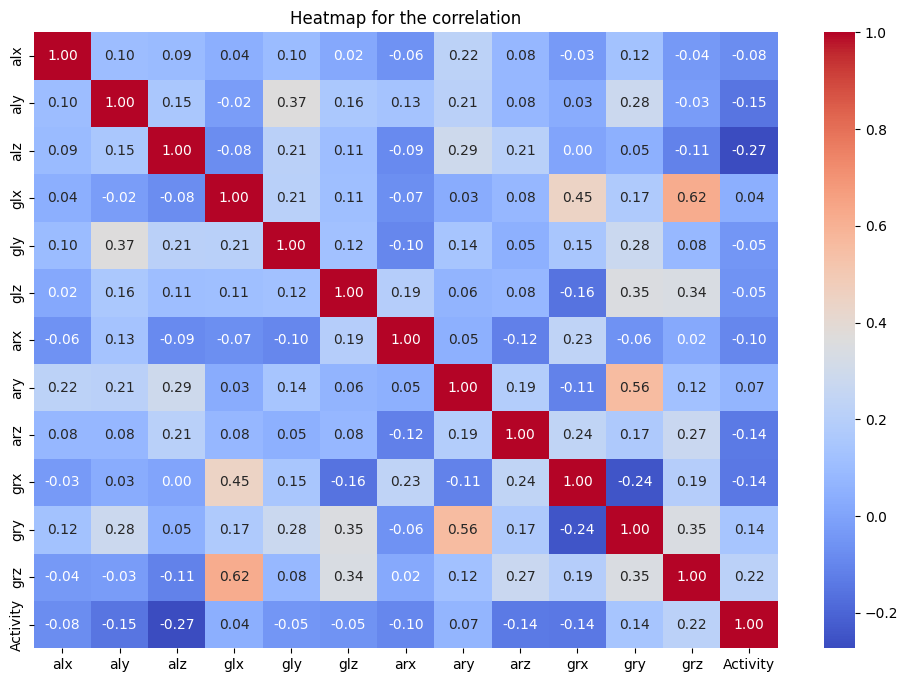

In [ ]:
# Visualization

numeric_columns = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap for the correlation')
plt.show()

# **Split The dataset**

In [ ]:
x = df.iloc[: , : -1]

# Scaling the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

x


array([[-0.25895808,  0.03475668,  0.49452548, ..., -1.4334374 ,
        -0.17038137, -0.36942088],
       [ 0.46065193,  0.36143843, -0.62127453, ..., -0.08935082,
        -1.6520061 ,  0.10629617],
       [ 0.44366823,  0.07515988, -0.61070949, ..., -0.49258751,
         1.45120653,  0.87296736],
       ...,
       [-3.46341134,  2.09302829,  2.88544445, ..., -0.48419031,
         1.12113737, -2.46498757],
       [ 0.09367864, -0.11284367,  0.28646781, ...,  0.98591844,
        -1.25016455, -1.36806729],
       [-0.42871679, -0.13115753,  0.4610363 , ..., -1.1394285 ,
        -0.54348251, -0.55420202]])

In [ ]:
# Put The target in y
y = df.iloc[: , -1]
y

63340      8
159318     5
88198     10
212376     2
62907      8
          ..
327911     6
286676     9
978089    12
860        0
298100     1
Name: Activity, Length: 104000, dtype: int64

In [ ]:
# Divide the data into 80% training and 30% test

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , shuffle = True , random_state = 0)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_train.shape)
print(x_test.shape)

(72800, 12)
(31200, 12)


# **KNN**

In [ ]:
# A3mel normalize lel data

# bazabat el Normalizer 3ala el dataset el m3aya ya3ny ba5aly fit 3ala el data
scaler = Normalizer().fit(x_train)

# batab2o 3ala el train data
x_train_normalized = scaler.transform(x_train)

# batab2o 3ala el test data
x_test_normalized = scaler.transform(x_test)

print(x_train_normalized)

[[-0.10179793 -0.0575143   0.18503097 ...  0.36252342 -0.35773586
   0.41397373]
 [-0.09043131 -0.02544923  0.25478761 ... -0.36573712 -0.1945384
   0.17459864]
 [ 0.10649203 -0.3236051  -0.23625491 ... -0.06417237  0.02109399
   0.17513963]
 ...
 [ 0.08700946  0.37967698  0.29618442 ...  0.03532094  0.36532378
   0.12024963]
 [-0.35662389  0.03295294 -0.0544442  ... -0.09992673 -0.12037285
   0.43289655]
 [-0.11891722 -0.04324114  0.16360218 ... -0.36537401 -0.32335742
  -0.30241319]]


In [ ]:
# Hyper Tuning

param_grid_KNN = {'n_neighbors': [3, 5, 7, 9, 11]}


knn = KNeighborsClassifier()

# Perform grid search
grid_search_KNN = GridSearchCV(knn, param_grid_KNN, cv=5, scoring='accuracy')  # You can adjust cv and scoring as needed
grid_search_KNN.fit(x_train_normalized, y_train)


# Get the best hyperparameters
best_params_KNN = grid_search_KNN.best_params_
print("Best Hyperparameters:", best_params_KNN)

Best Hyperparameters: {'n_neighbors': 3}


In [ ]:
# Training the model

knn = KNeighborsClassifier(**best_params_KNN)
knn.fit(x_train_normalized , y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prdict

y_pred_knn = knn.predict(x_test_normalized)

In [ ]:
# Cross Validetion

cv_knn = cross_val_score(knn, x_train_normalized, y_train, scoring='accuracy')
print(f"Cross-validation scores :  {cv_knn} , Score : {cv_knn.mean()} , STD Scores {cv_knn.std()} ")

Cross-validation scores :  [0.96813187 0.96442308 0.96799451 0.96304945 0.96414835] , Score : 0.9655494505494506 , STD Scores 0.0021037571119864374 


In [ ]:
# Accuracy

Accuracy_knn = accuracy_score(y_test , y_pred_knn)
Accuracy_knn

0.9650641025641026

In [ ]:
# Precision

precision_knn = precision_score(y_test , y_pred_knn , average = "weighted")
precision_knn

0.9658007811010053

In [ ]:
# Recall

recall_knn = recall_score(y_test , y_pred_knn , average = "weighted")
recall_knn

0.9650641025641026

In [ ]:
# F1 score

f1_knn = f1_score(y_test , y_pred_knn , average = "weighted")
f1_knn

0.9651409799526837

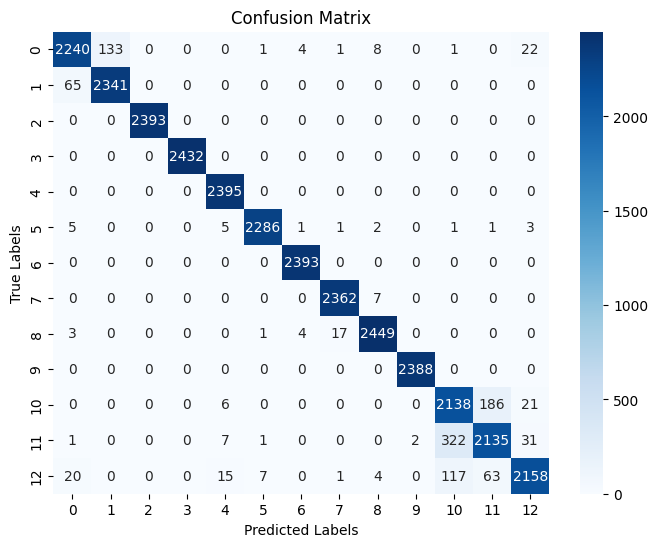

In [ ]:
# Confusion matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mean Squared Error(MSE)

mse_knn = mean_squared_error(y_test , y_pred_knn)
mse_knn

0.3508974358974359

# **Linear Regression**

In [ ]:
# Training the model

lin = LinearRegression()
lin.fit(x_train , y_train)

LinearRegression()

In [ ]:
# Predict

y_pred_lin = lin.predict(x_test)
y_pred_lin

array([4.52743511, 5.16731208, 7.57045552, ..., 4.75285824, 9.01547295,
       6.97532626])

In [ ]:
# Cross Validetion

cv_lin = cross_val_score(lin, x_train, y_train, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 213, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 94, in _check_targets
    raise ValueError(
ValueError: Class

In [ ]:
mse_lin = mean_squared_error(y_test , y_pred_lin)

In [ ]:
rmse_lin = np.sqrt(mse_lin)
rmse_lin

3.293659326060303

# **SVM**

In [ ]:
# Hyper Tuning

param_grid_svm = {'C': [1, 10, 20, 50] , 'kernel': ['linear', 'ploly' , 'rbf'] , 'gamma': [0.1, 1, 5, 10]}


svm = SVC()

# Perform grid search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')  # You can adjust cv and scoring as needed
grid_search_svm.fit(x_train, y_train)


# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters:", best_params_svm)

In [ ]:
# Training the model

svm = SVC(**best_params_svm)
svm.fit(x_train, y_train)

SVC(C=20, gamma=5)

In [ ]:
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([12,  9, 10, ...,  7,  7, 11])

In [ ]:
# Cross Validetion

cv_svm = cross_val_score(svm, x_train, y_train, scoring='accuracy')
print(f"Cross-validation scores :  {cv_svm} , Score : {cv_svm.mean()} , STD Scores {cv_svm.std()} ")

Cross-validation scores :  [0.87568681 0.8779533  0.87664835 0.87980769 0.87568681] , Score : 0.8771565934065932 , STD Scores 0.0015647286665822079 


In [ ]:
# Accuracy

Accuracy_svm = accuracy_score(y_test , y_pred_svm)
Accuracy_svm

0.8832051282051282

In [ ]:
# Precision

precision_svm = precision_score(y_test , y_pred_svm , average = "weighted")
precision_svm

0.9343877674888827

In [ ]:
# Recall

recall_svm = recall_score(y_test , y_pred_svm , average = "weighted")
recall_svm

0.8832051282051282

In [ ]:
# F1 Score

f1_svm = f1_score(y_test , y_pred_svm , average = "weighted")
f1_svm

0.891228065344675

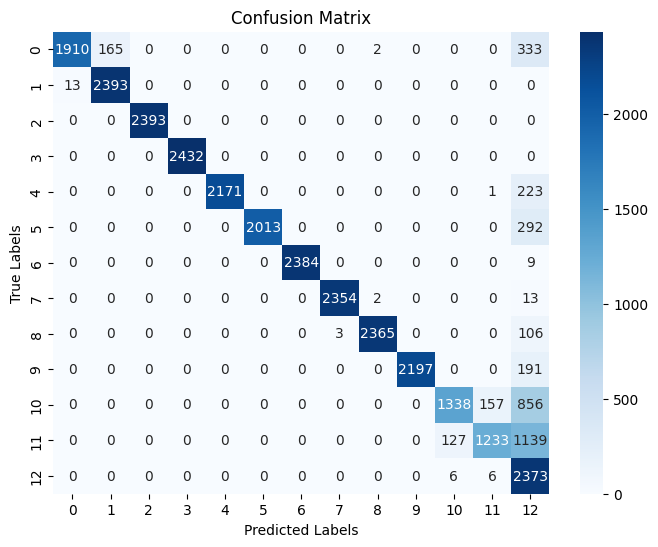

In [ ]:
# Confusion matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mean Squared Error(MSE)

mse_svm = mean_squared_error(y_test , y_pred_svm)
mse_svm

2.7510576923076924

# **Neural Ntework**

In [ ]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[12]),
    tf.keras.layers.Dense(units=32), tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(units=128), tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(units=128), tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Dense(units=128), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=13, activation="sigmoid"),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

NN.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optimizer)

NN.summary()

hist = NN.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                416       
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_73 (Dense)            (None, 128)               4224      
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_74 (Dense)            (None, 128)               16512     
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_75 (Dense)            (None, 128)             

In [ ]:
# Predict probabilities for each class

y_pred_prob = NN.predict(x_test)

# Convert probabilities to class labels
y_pred_NN = np.argmax(y_pred_prob, axis=1)

y_pred_NN

975/975 [==============================] - 2s 2ms/step


array([12,  6, 10, ...,  7,  7, 11])

In [ ]:
# Accuracy

# Evaluate the model on test data
test_loss, test_accuracy = NN.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

975/975 [==============================] - 2s 2ms/step - loss: 0.0690 - accuracy: 0.9755
Test Loss: 0.06902876496315002
Test Accuracy: 0.9754807949066162


In [ ]:
# Precision

precision_NN = precision_score(y_test, y_pred_NN, average='micro')

print(f'Precision: {precision_NN}')

Precision: 0.8209935897435897


In [ ]:
# F1 score

f1 = f1_score(y_test, y_pred_NN, average='micro')

print(f'F1 Score: {f1}')

F1 Score: 0.8209935897435897


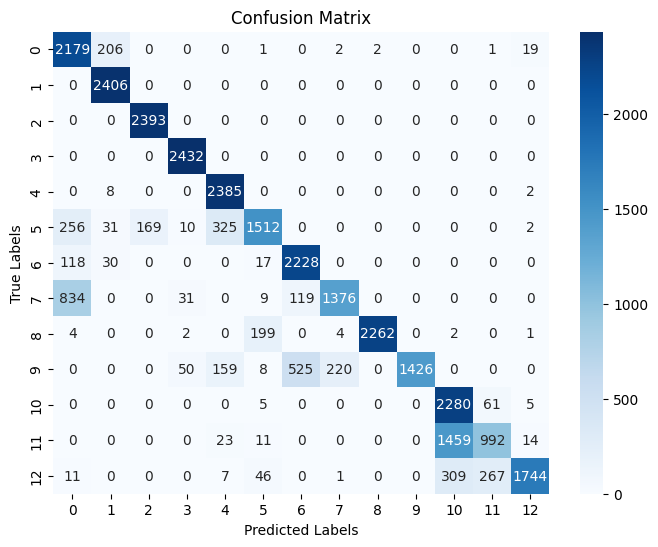

In [ ]:
# Confusion matrix

cm_NN = confusion_matrix(y_test, y_pred_NN)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_NN, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mean Squared Error(MSE)

mse_NN = mean_squared_error(y_test , y_pred_NN)
mse_NN

2.6145833333333335

# **Logistic Regression**

In [ ]:
# Hyper Tuning

param_grid_logistic  = { 'C': [0.001, 0.01, 0.1, 1, 10, 100] , 'penalty': ['l1', 'l2']  }


logistic = LogisticRegression()

# Perform grid search
grid_search_logistic = GridSearchCV(logistic, param_grid_logistic, cv=5, scoring='accuracy')  # You can adjust cv and scoring as needed
grid_search_logistic.fit(x_train, y_train)


# Get the best hyperparameters
best_params_logistic = grid_search_logistic.best_params_
print("Best Hyperparameters:", best_params_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logistic = LogisticRegression(**best_params_logistic)
logistic.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [ ]:
# Predict

y_pred_logistic = logistic.predict(x_test)
y_pred_logistic

array([ 2,  9, 10, ...,  7,  7, 11])

In [ ]:
# Cross Validetion

cv_logistic = cross_val_score(logistic, x_train, y_train, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(f"Cross-validation scores :  {cv_logistic} , Score : {cv_logistic.mean()} , STD Scores {cv_logistic.std()} ")

Cross-validation scores :  [0.68138736 0.68440934 0.68736264 0.68571429 0.67802198] , Score : 0.683379120879121 , STD Scores 0.003318096793731077 


In [ ]:
# Accuracy

Accuracy_logistic = accuracy_score(y_test , y_pred_logistic)
Accuracy_logistic

0.6855769230769231

In [ ]:
# Precision

precision_logistic = precision_score(y_test , y_pred_logistic , average = "weighted")
precision_logistic

0.6740033634670666

In [ ]:
# Recall

recall_logistic = recall_score(y_test , y_pred_logistic , average = "weighted")
recall_logistic

0.6855769230769231

In [ ]:
# F1 Score

f1_logistic = f1_score(y_test , y_pred_logistic , average = "weighted")
f1_logistic

0.6720215087768282

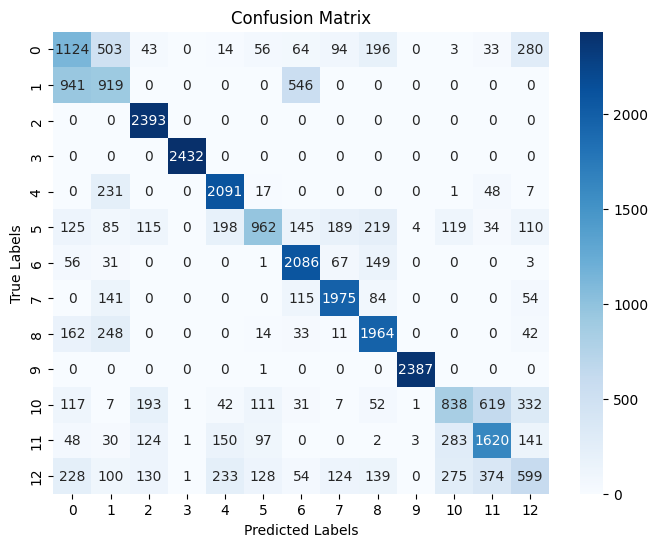

In [ ]:
# Confusion matrix

cm_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mean Squared Error(MSE)

mse_logistic = mean_squared_error(y_test , y_pred_logistic)
mse_logistic

9.218525641025641